In [1]:
import pandas as pd
import numpy as np
import time

from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt



In [9]:
dfMadelon_X = pd.read_csv(".\\data\\madelon_train.csv")
dfMadelon_Y1 = pd.read_csv(".\\data\\madelon_train_labels.csv")

dfMadelon_Y = dfMadelon_Y1['Predict']

dfMadelon = dfMadelon_X.copy()
dfMadelon["Predict"] = dfMadelon_Y
dfMadelon_X_NumOfFeatures = len(list(dfMadelon_X.columns))
print(dfMadelon_X.shape)
print(dfMadelon_Y.shape)
print(dfMadelon.columns)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfMadelon_X_scaled=scaler.fit_transform(dfMadelon_X)

print(dfMadelon_X_scaled.shape)


(2000, 500)
(2000,)
Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10',
       ...
       'Col492', 'Col493', 'Col494', 'Col495', 'Col496', 'Col497', 'Col498',
       'Col499', 'Col500', 'Predict'],
      dtype='object', length=501)
(2000, 500)


In [4]:
def ApplyPCA(data,itemlen=0):
    numFeature=0
    if(type(data).__name__ == 'DataFrame'):
        numFeature = len(list(data.columns))
    else:
        numFeature = itemlen
    model = PCA(numFeature)
        
    data_new = model.fit_transform(data)
        
        
    plt.title("PCA determining number of component",fontsize=16)
    plt.plot(np.cumsum(model.explained_variance_ratio_))   
    plt.xlabel("Number of Components",fontsize=10)
    plt.ylabel("Cumulative explained Variance Ratio",fontsize=10)    
    plt.show()
        

In [5]:
def ExtractFromPCA(data,rangVal=50):    
    reconErrorAvg =[]
    reconErrorStdDev =[]
    meanerr =0
    for i in range(1, rangVal):
        model = PCA(n_components=i)        
        data_new = model.fit_transform(data)
        df = pd.DataFrame(data_new)       
        df_inv=model.inverse_transform(data_new)
        if(type(data).__name__ == 'DataFrame'):
            meanerr = (df_inv-data).apply(np.absolute).mean().mean()
        else:
            meanerr = np.absolute((df_inv-data)).mean().mean()
        reconErrorAvg.append(meanerr)
        
    plt.plot(range(1, rangVal), reconErrorAvg, marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('Avg Reconstruction Error')
    plt.show()
    print(reconErrorAvg)

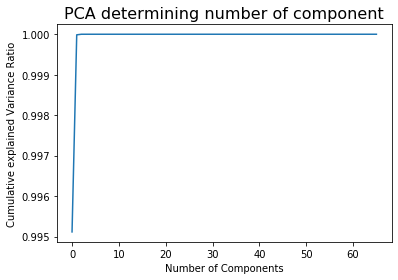

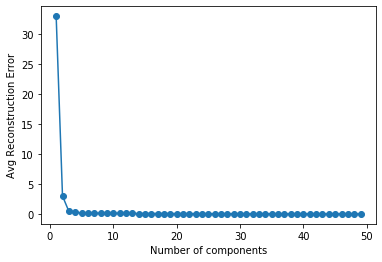

[32.92623741746643, 2.977217791333012, 0.440481053517049, 0.30806146166657883, 0.15438775212128084, 0.12586205295742836, 0.10940284980945819, 0.10093613390831975, 0.09645402350018842, 0.0913546691523405, 0.08781711368864498, 0.08299645745833137, 0.07752665516776648, 0.07129906048270468, 0.06922780189492142, 0.06723363310155969, 0.06558844792027214, 0.06192915512106356, 0.059049558954502965, 0.055792891813845384, 0.051067852411439456, 0.04679528156327866, 0.04476424952362189, 0.042136596102314475, 0.03946069826422079, 0.03745000712117419, 0.035327734011663794, 0.03362307983746328, 0.03210358342399706, 0.02929573166984635, 0.02639841682946248, 0.025813871121255383, 0.024161226906300414, 0.022431851735526556, 0.02051100358932835, 0.018964177821076577, 0.017162195320071322, 0.015731050023989005, 0.013343884552494552, 0.01163551483611622, 0.009442299383374233, 0.007597788541659366, 0.006839544561218587, 0.006457215462603663, 0.005459398398357358, 0.00494113376970358, 0.003938756028051623, 0

In [6]:
#Adult hot encoded
np.random.seed =10
ApplyPCA(X_HotEncoded)
ExtractFromPCA(X_HotEncoded)

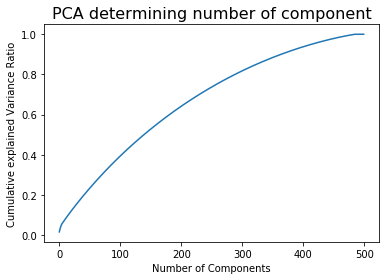

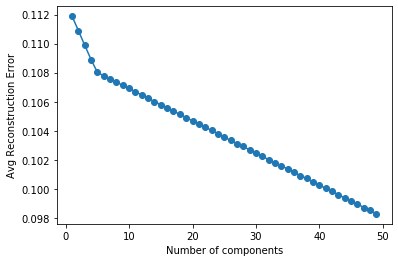

[0.11188476299687182, 0.11090131252070469, 0.10988545143484199, 0.10890222948947044, 0.10801950123834493, 0.10778159700086376, 0.1075571334113259, 0.10734306549310148, 0.10713022741206711, 0.10691048673469924, 0.10669333915220759, 0.10646101442308899, 0.1062372490768418, 0.10600705810135996, 0.10579407672171907, 0.10556728158209981, 0.10534135612662096, 0.1051330356529631, 0.1048938472208803, 0.1046877995260384, 0.10445591281946638, 0.10424348666904171, 0.10402389207477467, 0.10380116827053881, 0.10355827447221043, 0.10333633741000318, 0.10311775332466241, 0.10291925324706055, 0.10267617385002432, 0.10247414837236989, 0.10222872161358307, 0.10201371083410032, 0.10179402591200606, 0.10159112340800293, 0.1013706890316693, 0.1011502580106883, 0.10090336960637755, 0.1007137935253137, 0.10045977045492506, 0.10026021472544314, 0.1000342041205143, 0.09983481847820398, 0.09959003041997747, 0.09937754671621259, 0.0991802256880687, 0.09896498624545749, 0.09871168790177502, 0.0985105720131791, 0.

In [8]:
#Madelon scaled
#type(dfMadelon_X_scaled).__name__
#print(dfMadelon_X_scaled)
ApplyPCA(dfMadelon_X_scaled,len(list(dfMadelon_X.columns)))
ExtractFromPCA(dfMadelon_X_scaled)